In [22]:
## BGD 代码示例 参考网址： https://blog.csdn.net/kwame211/article/details/80364079
"""
BGD(Batch gradient descent)批量梯度下降法：每次迭代使用所有的样本

每次迭代都需要把所有样本都送入，这样的好处是每次迭代都顾及了全部的样本，做的是全局最优化.
"""
#coding = utf-8
import random
input_x = [[1,4],[2,5],[5,1],[4,2]]
y = [19,26,19,20]
theta = [1,1]
loss = 10
step_size = 0.01
eps = 0.0001
max_iters = 10000
error =0
iter_count = 0

err1 = [0,0,0,0]  #求Θ1梯度的中间变量1
err2 = [0,0,0,0]  #求Θ2梯度的中间变量2

while loss > eps and iter_count < max_iters:
    loss = 0
    err1sum = 0
    err2sum = 0
    for i in range(4):
        pred_y = theta[0]*input_x[i][0] + theta[1]*input_x[i][1]
        err1[i] = (pred_y - y[i])*input_x[i][0]
        err2[i] = (pred_y - y[i])*input_x[i][1]
    err1sum = sum(err1)
    err2sum = sum(err2)
    theta[0] = theta[0] - step_size*err1sum/4
    theta[1] = theta[1] - step_size*err2sum/4
    for i in range(4):
        pred_y = theta[0]*input_x[i][0] + theta[1]*input_x[i][1]
        error = (1 / (2*4))*(pred_y-y[i])**2
        loss = loss + error
    iter_count += 1
    #print("iter count :",iter_count)
print("theta:",theta)
print("final loss:", loss)
print('iters:',iter_count)

theta: [3.0044552563214433, 3.9955447274498894]
final loss: 9.428456066652548e-05
iters: 97


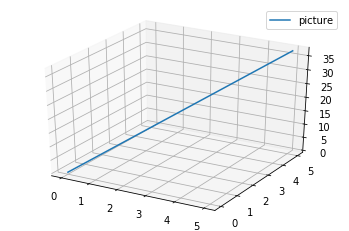

In [16]:
# 画三维图

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize']=10#图例字号
fig = plt.figure()
ax = fig.gca(projection='3d')#三维图形

x = np.linspace(0,5,100)
y = np.linspace(0,5,100)
#theta = [3.0044552563214433, 3.9955447274498894]
theta = [2.863684771033021, 4.5708200212992445]
z = theta[0]*x + theta[1]*y
ax.plot(x, y, z, label='picture')
ax.legend()
plt.show()



In [21]:
"""
SGD（Stochastic gradientdescent）随机梯度下降法：每次迭代使用一个样本

针对BGD算法训练速度过慢的缺点，提出了SGD算法，普通的BGD算法是每次迭代把所有样本都过一遍，
每训练一个样本就把梯度更新一次。而SGD算法是从样本中随机抽出一个，训练后按梯度更新一次，
然后再抽取一个，再更新一次，在样本量及其大的情况下，可能不用训练完所有的样本就可以获得
一个损失值在可接受范围之内的模型了。

"""
import random

input_x = [[1,4],[2,5],[5,1],[4,2]]
y = [19,26,19,20]
theta = [1,1]
loss = 10
step_size = 0.01
eps = 0.0001
max_iters = 10000
error = 0
iter_count = 0

while loss >  eps and iter_count < max_iters:
    loss = 0
    i = random.randint(0,3)
    pred_y = theta[0]*input_x[i][0] + theta[1]*input_x[i][1]
    theta[0] = theta[0] - step_size*(pred_y-y[i])*input_x[i][0]
    theta[1] = theta[1] - step_size*(pred_y- y[i])*input_x[i][1]
    for i in range(4):
        pred_y = theta[0]*input_x[i][0] + theta[1]*input_x[i][1]
        error = (1/(2))*(y[i]-pred_y)**2
        loss = loss + error
    iter_count += 1
    #print("iter count :",iter_count)
print("theta:",theta)
print("final loss:", loss)
print('iters:',iter_count)
 


theta: [3.004319410546979, 3.9952673724062677]
final loss: 9.808207021505544e-05
iters: 88


In [44]:
'''
MBGD（Mini-batch gradient descent）小批量梯度下降：每次迭代使用batch_size个样本

SGD相对来说要快很多，但是也有存在问题，由于单个样本的训练可能会带来很多噪声，
使得SGD并不是每次迭代都向着整体最优化方向，因此在刚开始训练时可能收敛得很快，
但是训练一段时间后就会变得很慢。在此基础上又提出了小批量梯度下降法，它是每次
从样本中随机抽取一小批进行训练，而不是一组。
'''
#-*- coding: utf-8 -*-  
import random

#用y = Θ1*x1 + Θ2*x2来拟合下面的输入和输出  
#input1  1   2   5   4  
#input2  4   5   1   2  
#output  19  26  19  20  
input_x=[[1,4],[2,5],[5,1],[4,2]]
y=[19,26,19,20]#输出
theta=[1,1]#θ参数初始化
loss=10#loss先定义一个数，为了进入循环迭代
step_size=0.01#步长
eps=0.0001#精度要求
max_iters=10000#最大迭代次数
error=0#损失值
iter_count=0#当前迭代次数

while loss >  eps and iter_count < max_iters:
    loss = 0
    i=random.randint(0,3)
    j=(i+1)%4
    pred_y0=theta[0]*input_x[i][0]+theta[1]*input_x[i][1]
    pred_y1=theta[0]*input_x[j][0]+theta[1]*input_x[j][1]
    theta[0]=theta[0] - step_size*(1/2)*((pred_y0 - y[i])*input_x[i][0] + (pred_y1 - y[j])*input_x[j][0])
    theta[1]=theta[1] - step_size*(1/2)*((pred_y0 - y[i])*input_x[i][1] + (pred_y1 - y[j])*input_x[j][1])
    for i in range(4):
        pred_y=theta[0]*input_x[i][0]+theta[1]*input_x[i][1]
        error=(1/(2*2))*(pred_y - y[i])**2  #  这里面(1/(2*2)) 中有两个2 ，
                                            # 第二个2 意思是有batch_size ， 我们这里面取的是2
        loss=loss + error
        iter_count += 1
        #print('iters_count',iter_count)
        
print('theta: ',theta)
print('final loss: ',loss)
print('iters: ',iter_count)


theta:  [3.0033484849822423, 3.9966925812102105]
final loss:  9.374133720616877e-05
iters:  216
